Add Description

In [1]:
# Dependencies and Setup

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Add Description

In [2]:
# File to Load
city_data_to_load = "data/city_data.csv"

ride_data_to_load = "data/ride_data.csv"

Add Description

In [3]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load, low_memory=False, encoding="UTF-8")

ride_data = pd.read_csv(ride_data_to_load, low_memory=False, encoding="UTF-8")

Add Description

In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how="outer", on="city")

# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


Add Description

In [5]:
urban_city = combined_data[combined_data["type"] == "Urban"]

rural_city = combined_data[combined_data["type"] == "Rural"]

suburban_city = combined_data[combined_data["type"] == "Suburban"]

Add Description

In [6]:
count_rides_urban = urban_city.groupby("city")["type"].count()

count_rides_rural = rural_city.groupby("city")["type"].count()

count_rides_suburban = suburban_city.groupby("city")["type"].count()

Add Description

In [7]:
avg_fare_urban = urban_city.groupby("city").mean()["fare"]

avg_fare_rural = rural_city.groupby("city").mean()["fare"]

avg_fare_suburban= suburban_city.groupby("city").mean()["fare"]

Add Description

In [8]:
count_drivers_urban =  urban_city.groupby("city")["driver_count"].first()

count_drivers_rural =  rural_city.groupby("city")["driver_count"].first()

count_drivers_suburban =suburban_city.groupby("city")["driver_count"].first()


## Bubble Plot of Ride Sharing Data

Add Description

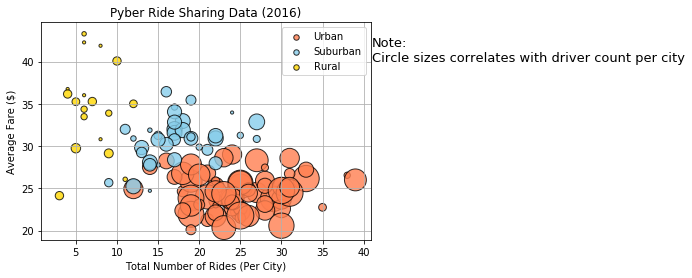

In [20]:
fig = plt.figure(figsize=(13,4))

ax = fig.add_subplot(121)


ax.scatter(count_rides_urban, avg_fare_urban, s=count_drivers_urban*10, marker = "o", label = "Urban",
           color="coral", alpha=.8, edgecolors="black", linewidth=1)

ax.scatter(count_rides_suburban, avg_fare_suburban, s=count_drivers_suburban*10, label = "Suburban",
           marker = "o",color= "skyblue", alpha=.8, edgecolors="black", linewidth=1)

ax.scatter(count_rides_rural, avg_fare_rural, s=count_drivers_rural*10 ,marker = "o", label= "Rural", 
           color="gold", alpha=.8, edgecolors="black", linewidth=1)


plt.xlabel("Total Number of Rides (Per City)")

plt.ylabel("Average Fare ($)")

plt.title("Pyber Ride Sharing Data (2016)")

lgnd = plt.legend()

lgnd.legendHandles[0]._sizes = [30]

lgnd.legendHandles[1]._sizes = [30]

lgnd.legendHandles[2]._sizes = [30]

plt.grid()

plt.text(41,40,"Note:\nCircle sizes correlates with driver count per city", fontsize=13)

plt.show()


fig.savefig("Images_Results/Rides_by_AvgFare.png")


## Total Fares by City Type

Add Description

In [10]:
#fare by city type

per_type_fare = round(combined_data.groupby(["type"]).sum()["fare"]/combined_data["fare"].sum()*100,1)

label= per_type_fare.index

colors = ["gold", "skyblue","lightcoral"]

Add Description

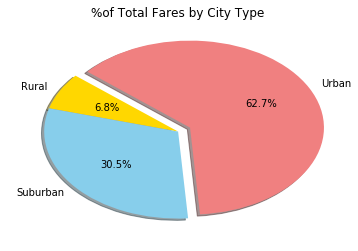

In [11]:
plt.pie(per_type_fare, colors=colors, labels=label, autopct="%1.1f%%", shadow=True, startangle=140, explode=[0,0,0.1])

plt.title("%of Total Fares by City Type")

plt.savefig("Images_Results/Fares_by_CityType.png")


## Total Rides by City Type

Add Description

In [12]:
per_type_rides =combined_data.groupby(["type"]).count()["ride_id"]/combined_data["ride_id"].count()*100

label= per_type_rides.index

colors = ["gold", "skyblue","lightcoral"]


Add Description

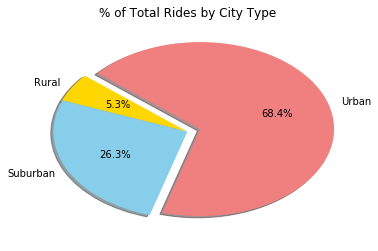

In [13]:
plt.pie(per_type_rides, colors=colors, labels=label, autopct="%1.1f%%", shadow=True, startangle=140, explode=[0,0,0.1])

plt.title("% of Total Rides by City Type")


plt.savefig("Images_Results/Rides_by_CityType.png")

## Total Drivers by City Type

Add Description

In [14]:
count_drivers_urban_df = pd.DataFrame(count_drivers_urban).reset_index()

sum_urban_drivers = count_drivers_urban_df["driver_count"].sum()

count_drivers_rural_df = pd.DataFrame(count_drivers_rural).reset_index()

sum_rural_drives = count_drivers_rural_df["driver_count"].sum()

count_drivers_suburban_df = pd.DataFrame(count_drivers_suburban ).reset_index()

sum_suburban_drives = count_drivers_suburban_df["driver_count"].sum()


Add Description

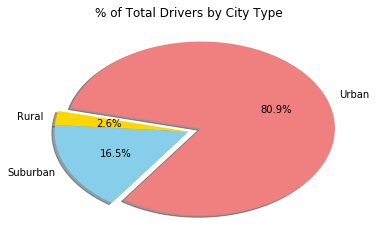

In [15]:
fig = plt.figure()

labels= ["Urban", "Rural", "Suburban"]

sizes= [sum_urban_drivers, sum_rural_drives, sum_suburban_drives]

colors = ["lightcoral", "gold", "skyblue"]

explode=[0.1,0,0]


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=235)


plt.title('% of Total Drivers by City Type')

plt.savefig("Images_Results/Drivers_by_CityType.png")







Conclusion